## Contexte

Le jeu de données utilisé est le jeu de données "new-plant-diseases-dataset" disponible sur Kaggle.

L'étude préalable et le dataviz a permis d'identifier 38 classes de plantes : certaines classes correspondent à des plantes saines, et les autres à des plantes malades.

Le jeu d'entrainement est constitué d'environ 70000 photos, en résolution 256*256, et en couleur : plus plus d'information, voir l'étude préliminaire.

La classification de photos relatives à ces plantes amène naturellement à utiliser un réseau de neurones et plus particulièrement un réseau de neurones spécialisé dans le traitement des images, un Convolutional Neural Networks ou CNN.

## Objectif 

Il est nécessaire d'avoir une base de référence pour l'implémentation du CNN.

Certes un modèle de classification classique comme par exemple RandomForest pourrait servir de baseline à ce projet.

Néanmois, devant la très grande quantité de photos disponilbe dans le jeu de données, une implémentation basique d'un CNN permettra également d'avoir une baseline interessante pour ce projet.

Donc cette itération permettra de définir un CNN très basique et adapté au jeu de données disponible.

Ce CNN sera ensuite entrainé et les scores pourront être graphiquement visualisés.

Une première conclusion sera réalisée à partir des résultats obtenus.

In [1]:
# import du fichier ressources

import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from lib import ressources as res
racine = os.path.abspath(os.path.realpath(res.dir_root))


In [2]:
# Import des librairies

# initialisation du CNN de manière séquentielle et non en graphe
from keras.models import Sequential

# les vidéos sont en 3D, on ajoute une dimension supplémentaire qui est le temps
# étape de convolution -> 2D car image
from keras.layers import Conv2D

# étape de max pooling
from keras.layers import MaxPooling2D

# étape de flatten
from keras.layers import Flatten

# couches du CNN
from keras.layers import Dense


In [3]:
# Le CNN est initialisé en mode séquentiel

classifier = Sequential()

### Couche de convolution

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859470#overview

Image input -> Feature detector pour détecter les features -> n feature maps ou couche de convolution
La matrice feature detector est généralement une matrice de (3, 3)

**Fonction d'activation relu**

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859472#overview

Utilisation d'une fonction redresseur (relu) pour que le modèle soit moins linéaire : passage du noir au blanc (ou de 0 à 1), cela retire les dégradés ou transitions de l'image.

En effet les images sont des objets non linéaires : les pixels passent d'une valeur à l'autre, il y a des contours d'image.

f_redresseur(x) = max(x, 0) 

In [4]:
# Conv2D -> couche de convolution
# Pour des raisons de limitation ressources système, les photo sont converties en 128 * 128

# filters = 32 : 
# Le nombre de feature detectors indique le nombre de feature maps qui vont être créés dans la couche à convolution -> les puissances de 2 sont appréciées et 32 est une valeur couramment admise

# kernel_size = (3, 3) : 
# Taille de la matrice de chaque feature detector
# Les matrices (5, 5) et (7, 7) sont aussi utilisées couramment

# strides = 1 :
# Translation de la fenêtre sur l'image pour remplir chaque feature maps

# Information nécessaire pour indiquer l'entrée -> input_shape = (128, 128, 3) : 
# image en RGB -> 3
# taille de l'image -> 128*128 : les images seront redimentionnées

# activation = 'relu' : 
# on ajout de la non linéarité dans l'image : les valeurs négatives sont remplacées par 0

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, input_shape = (128, 128, 3), activation = 'relu'))

### Couche Max spooling

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859476#overview 

Permet d'obtenir l'invariance faciale dans le cas de photos d'un animal pour lequel le CNN doit reconnaitre les caractérisitiques particulières quelques soit l'angle du visage de l'animal.

Feature Map -> Max Pooling -> Pooled Feature Map ou couche de pooling.

La matrice de max pooling est souvent de dimension (2, 2)

On retire de l'information mais on garde l'information qui contient la feature.

Une même caractéristique (ou feature) prise sous un angle différent ou avec un zoom différent a des chances d'obtenir le même résultat de pooled feature map.

Autre avantage : l'image contient moins d'informations peu importante et on évite le surentrainement. On ne garde que l'information utile qui va servir à généraliser le modèle.

### Démonstration en live :

https://www.cs.ryerson.ca/~aharley/vis/conv/

Traduction du mot 'Downsampling' sur le site de démonstration en ligne : Pooled Feature Map ou couche de pooling.
On peut analyser les pixels utilisé pour la convolution, le max pooling et les noeuds du CNN utilisés par la sortie.


In [5]:
# couche : Max pooling

# pool_size = (2, 2) : 
# couche de pooling : la longueur des côtés des images est divisée par deux
# la valeur (2, 2) est un bon compromis pour réduire l'image sans pertes importantes d'information
# permet de réduire les features maps en gardant les caractéristiques importantes de l'image -> le nombre de neurones du CNN sera réduit sans perte d'information

classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Couche Flattening

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859500#overview 

Les matrices carrées à n dimentions issues par l'opération de max pooling sont transformées (aplaties) une matrice à une seule colonne et donc à une seule dimension.
Chaque valeur de la matrice obtenue sera ensuite intégrée à un noeud de la couche d'entrée du CNN .

Après l'étage de convolution et de max pooling la  matrice d'une colonne contient maintenant des valeurs numériques correspondantes aux pixels de l'image initiale -> c'est pour cela qu'il est possible de transformer une matrice (n, n) en une matrice (n**n, 1).

In [6]:
# Couche : Flattening

classifier.add(Flatten())

### Couche complètement connectée ou couche Dense

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859504#overview

Couche cachée dans un ANN même celle-ci est complètement connectée -> graphe fortement connexe entre les noeuds d'entrée et les noeuds de sortie

Normalement la couche d'entrée (input layer) contient déjà les caractéristiques des images qui permettent l'apprentissage du CNN.

Mais en ajoutant une fully connected layer on peut ajouter des combinaisons de features et donc d'améliorer les résultats.

Il peut y avoir plusieurs fully connected layer et de tailles différentes

**Remarque**

La fonction de cout est calculée -> rétropropagation -> les poids sont mis à jours mais également les features detector


In [7]:
# Couche : Full connection

# units = 128 ce paramètre dépend des x neurones en entrée et y neurones en sortie -> il faut faire des tests pour évaluer ce hyper-paramètre : ici les valeurs sont plus faibles que nécessaire mais les ressources système sont limitée -> à surveiller donc.

classifier.add(Dense(units = 128, activation = 'relu'))

## Softmax et entropie croisée

https://www.udemy.com/course/le-deep-learning-de-a-a-z/learn/lecture/8859514#overview

Par exemple, il y a 2 neurones en sortie, et leur résultat est chien à 0.95 et chat à 0.5. 

Comment la somme des résultats est exactement égale à 1 ? En effet, une probabilité est comprise entre 0 et 1. 

En utilisant la fonction d'activation softmax pour chaque neurone de sortie.

La fonction softmax fonctionne avec la fonction d'entropie croisée qui calcule l'erreur du CNN.

* Erreur de classification -> Peu fiable
* Erreur quadratique moyenne -> Correct
* Erreur d'entropie croisée -> Correct

Cas de très petites valeurs de prédictions, minuscules par rapport à la vraie valeur : la correction des poids, dans le cas du calcul du gradiant pour l'erreur quadratique moyenne, sera très très lente.

L'erreur sera, par exemple, la même avec 10e-6 et 10e-3 en prenant l'erreur quadratique moyenne.

L'entropie croisée utilisant les log pour les calculs, l'erreur sera ici 2 fois moins grande car log(10e-6) = 6 et log(10e-3) = 3.

**Attention :** cela concerne la classification et non la régression pour laquelle on utilisera l'erreur quadratique moyenne.

In [8]:
# Couche de sortie

# couche de sortie -> il y a 38 neurones ici -> utiliser la fonction d'activation softmax

classifier.add(Dense(units = 38, activation = 'softmax'))

In [9]:
# compilation du CNN

# loss = 'categorical_crossentropy' -> fonction de coût pour modèle de classification de plusieurs catégories

# metrics = ['accuracy'] -> méthode de calcul de la performance

# optimizer = 'adam' -> algorithe de calcul de la descente de gradient

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Phase de préparation des données

https://keras.io/api/preprocessing/image/

* 1 dossier train
* 1 dossier valid

Dans chaque dossier : 1 sous-dossier pour le type d'image à détecter -> par exemple 1 sous-dossier par membre de la famille contenant des images de ce membre de la famille

**ImageDataGenerator :**

Permet de créer de nouvelles images par la transformation de celles existantes : retournement, légère déformation... -> évite aussi le overfitting

In [ ]:
# augmentation du jeu d'images
from keras.preprocessing.image import ImageDataGenerator


# rescale = 1./255 :
# Toutes les images sont mises à la même échelle -> cela est équivalent pour des valeurs numériques à une normalisation => moyenne = 0, et écart type ou variance = 1

# shear_range = 0.2 :
# Transvection de l'image -> équivalent à translation par rapport à un point fixe

# zoom_range = 0.2 -> le zoom est possible

# horizontal_flip = True -> le flip horizontal est aussi possible


# préparation du traitement de génération de nouvelles images pour le jeu d'entrainement
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# préparation du traitement de génération de nouvelles images pour le jeu de test : l'échelle des valeurs est normalisées
test_datagen = ImageDataGenerator(rescale = 1./255)



# target_size = (128, 128) :
# Taille des images : paramètre idem que l'initialisation du CNN

# batch_size = xxxx :
# Les poids sont mis à jour après xxxx observations et non après chaque observation

# class_mode = 'categorical' : classification de plus d'une classe


# traitement des images du jeu d'entrainement
training_set = train_datagen.flow_from_directory(res.dir_dataset_train,
                                                 target_size = (128, 128),
                                                 batch_size = 280,
                                                 class_mode = 'categorical')

# traitement des images du jeu de test
test_set = test_datagen.flow_from_directory(res.dir_dataset_valid,
                                            target_size = (128, 128),
                                            batch_size = 70,
                                            class_mode = 'categorical')


In [11]:
# steps_per_epoch = 250 : par exemple quand il y a 8000 images au total / 32 images par lot = 250 étapes par époque
steps_per_epoch = training_set.n // training_set.batch_size

# validation_steps = 62 : par exemple quand il y a 2000 images au total / 32 images par lot = 62 étapes par époque
validation_step = test_set.n // test_set.batch_size

# fit_generator -> entraine le CNN et effectue le test aussi et mesure la performance : pas besoin ici d'utiliser le KFold cross validation pour les validations
training_history = classifier.fit_generator(training_set,
                         steps_per_epoch = steps_per_epoch,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = validation_step)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
251/251 [==============================] - 643s 3s/step - loss: 3.1749 - accuracy: 0.2614 - val_loss: 1.5343 - val_accuracy: 0.5479
Epoch 2/20
251/251 [==============================] - 613s 2s/step - loss: 1.2447 - accuracy: 0.6295 - val_loss: 1.2361 - val_accuracy: 0.6324
Epoch 3/20
251/251 [==============================] - 625s 2s/step - loss: 0.9393 - accuracy: 0.7150 - val_loss: 1.5443 - val_accuracy: 0.5677
Epoch 4/20
251/251 [==============================] - 648s 3s/step - loss: 0.7926 - accuracy: 0.7572 - val_loss: 0.9091 - val_accuracy: 0.7245
Epoch 5/20
251/251 [==============================] - 627s 2s/step - loss: 0.6893 - accuracy: 0.7897 - val_loss: 0.9586 - val_accuracy: 0.7261
Epoch 6/20
251/251 [==============================] - 619s 2s/step - loss: 0.6257 - accuracy: 0.8086 - val_loss: 0.8211 - val_accuracy: 0.7581
Epoch 7/20
251/251 [==============================] - 620s 2s/step

In [12]:
# import numpy as np
# import tensorflow as tf
from tensorflow import keras

path_cnn = res.dir_dataset + 'cnn_1.save'
# print(path_cnn)

# sauvegarde du modèle entrainé
classifier.save(path_cnn);

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\NOEL\dev\python\dataset\new-plant-diseases-datasetcnn_1.save\assets


In [18]:
# les scores obtenus pendant l'entrainement sont lus
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

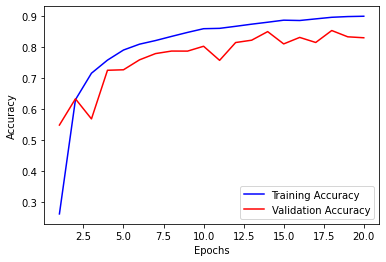

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 21, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de validation
plt.plot(np.arange(1 , 21, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

## Conclusion

Les résultats ont rapidement convergé vers des scores assez satisfaisants, plus pour le jeu d'entrainement que pour le jeu de test : un overfitting semble être présent tout du long du déroulé des ephochs.

Le nombre d'ephoch choisi est comme attendu insuffisant. 

Certe les résultats dépassent les 80% pour le jeu de test, mais la courbe d'apprentissage semble vouloir continuer sa progression au delà du nombre des epochs utilisé : au moins pour la courbe d'apprentissage correspondant au jeu d'entrainement.

Ces résultats peuvent servir de baseline : la suite du projet permettra l'exploration de solutions d'amélioration des résultats.
